In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target
df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X,y = boston.data, boston.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float().unsqueeze(1)
y_test = torch.tensor(y_test).float().unsqueeze(1)   

In [ ]:
mean = X_train.mean(dim=0)
std = X_train.std(dim=0)
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

**Linear Regression Model**

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.fc = nn.Linear(13,128,bias = True)  # Define the hidden layer
    self.out = nn.Linear(128,1,bias = True)  # Define the output layer
    self.relu = nn.ReLU()        # Define the activation function

  def forward(self,x):
    x = self.fc(x)
    x = self.relu(x)
    x = self.out(x)
    return x

In [ ]:
model = LinearRegression(input_size = X_train.shape[1],output_size=1)
#X_train.shape[1]

In [ ]:
criterion = nn.MSELoss()  # nn.L1Loss
optimizer = optim.SGD(model.parameters(),lr = 0.01)

**Training**

In [ ]:
losses = []
num_epochs = 100000
for epoch in range(num_epochs):
  #Forward pass
  y_pred = model(X_train)
  loss = criterion(y_pred,y_train)

  #Backward Pass
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/100000], Loss: {loss.item(): .4f}')
  losses.append(loss.item())

Epoch [100/100000], Loss:  10.8245
Epoch [200/100000], Loss:  8.9074
Epoch [300/100000], Loss:  7.9844
Epoch [400/100000], Loss:  7.3795
Epoch [500/100000], Loss:  6.8915
Epoch [600/100000], Loss:  6.4802
Epoch [700/100000], Loss:  6.1539
Epoch [800/100000], Loss:  5.8784
Epoch [900/100000], Loss:  5.6758
Epoch [1000/100000], Loss:  5.5831
Epoch [1100/100000], Loss:  5.5222
Epoch [1200/100000], Loss:  5.3414
Epoch [1300/100000], Loss:  5.2709
Epoch [1400/100000], Loss:  5.3000
Epoch [1500/100000], Loss:  5.2720
Epoch [1600/100000], Loss:  5.0143
Epoch [1700/100000], Loss:  4.6494
Epoch [1800/100000], Loss:  5.0292
Epoch [1900/100000], Loss:  4.2802
Epoch [2000/100000], Loss:  5.0172
Epoch [2100/100000], Loss:  4.1010
Epoch [2200/100000], Loss:  4.0645
Epoch [2300/100000], Loss:  4.8087
Epoch [2400/100000], Loss:  3.6396
Epoch [2500/100000], Loss:  4.3462
Epoch [2600/100000], Loss:  4.0568
Epoch [2700/100000], Loss:  3.3936
Epoch [2800/100000], Loss:  4.2899
Epoch [2900/100000], Loss:  

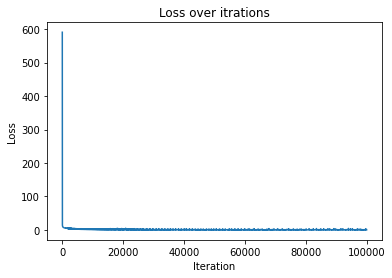

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(100000),losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over itrations')
plt.show()

**Testing**

In [ ]:
with torch.no_grad():
  y_test_pred = model(X_test)
  test_loss = criterion(y_test_pred,y_test)
  print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 9.5076


In [ ]:
mae = torch.abs(y_test_pred - y_test).mean()
print('Mean Absolute Error:',mae.item())

Mean Absolute Error: 2.3018765449523926


In [ ]:
def mean_absolute_percentage_error(y_true,y_prediction):
  return 100 * torch.mean(torch.abs((y_true-y_prediction) / y_true))

mape = mean_absolute_percentage_error(y_test,y_test_pred)
print(mape)

tensor(11.7347)
